# Hierarchical Clustering

In [1]:
# draw a denogram

In [2]:
# import the library
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# create data
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

X.shape # 10 rows and 2 col

(10, 2)

In [4]:
# Generate scatter plot

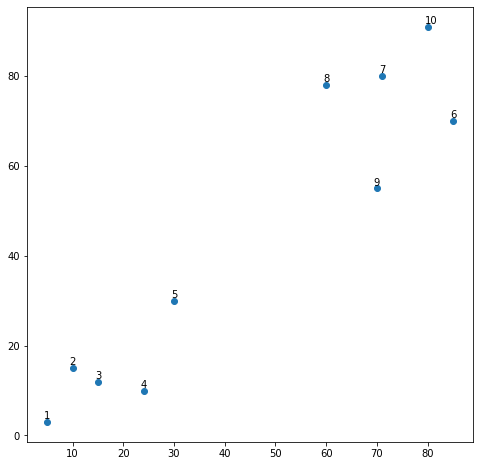

In [5]:
labels = range(1, 11)   # label starts from 1 till 10
plt.figure(figsize=(8, 8))   # fix the plot size

## scatter plot
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]): 
    # xytext - position of the text
    plt.annotate(label, xy=(x, y), xytext=(-3, 3),textcoords='offset points')
plt.show()  

# Dendogram steps

In [1]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [6]:
# library
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

In [7]:
#measure the distance using linkage method
linked = linkage(X, 'single') # linkage method : single, average,centroid, wards

labelList = range(1, 11)


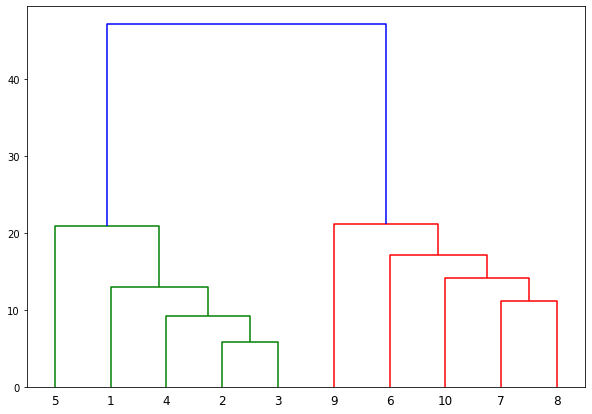

In [8]:
plt.figure(figsize=(10, 7))  
dendrogram(linked, orientation='top',labels=labelList)
plt.show()  

In [9]:
# if the cut is like below, then we will have 2 clusters
# cluster 1  - 8,7,10,6,9
# cluster 2  - 9,6,10,7,8

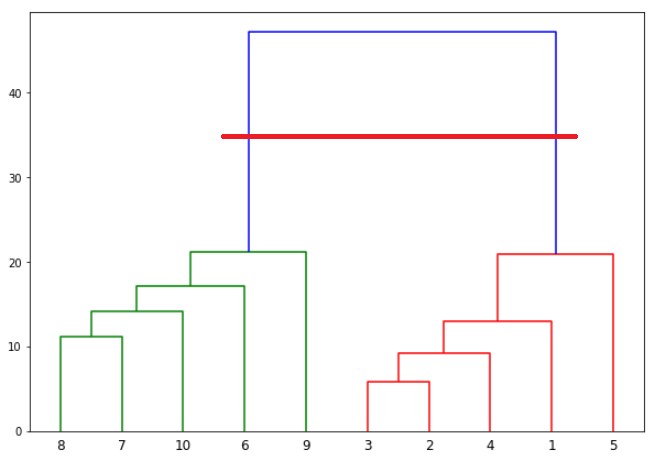

In [58]:
# if the cut is like below, then we will have 3 clusters
# cluster 1  - 8,7,10,6
# cluster 2  - 3,2,4,1
# cluster 3  - 9,5

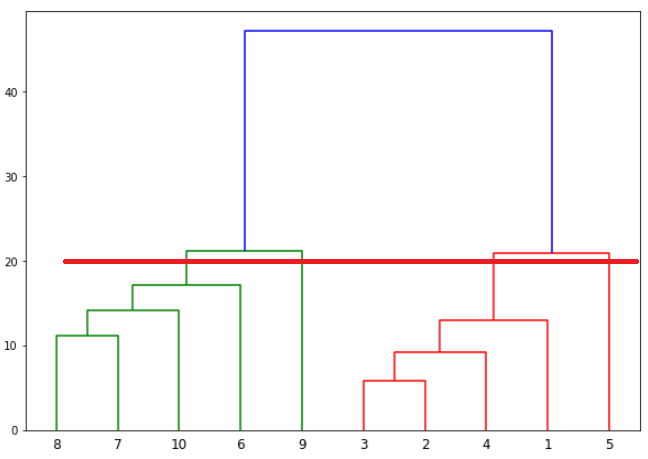

# Hierarchical Clustering via Scikit-Learn

#example 1 - Hierarchical clustering with dummy data


In [1]:
# import libraries
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [2]:
#create data
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

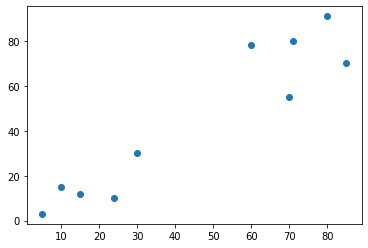

In [3]:
# Scatter plot for the given input data
plt.scatter(X[:,0],X[:,1], cmap='rainbow')

In [5]:
from sklearn.cluster import KMeans

In [6]:
clus_error= []
for cluster in range(1,10):
    clusters = KMeans(cluster,n_init=10)
    clusters.fit(X)
    labels   = clusters.labels_
    centroids= clusters.cluster_centers_
    clus_error.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":range(1,10), "cluster_errors": clus_error } )
clusters_df[0:15]
    

,num_clusters,cluster_errors
0,1,19096.400000
1,2,1902.400000
2,3,1336.466667
3,4,798.666667
4,5,562.500000
5,6,337.500000
6,7,175.833333
7,8,79.500000
8,9,17.000000


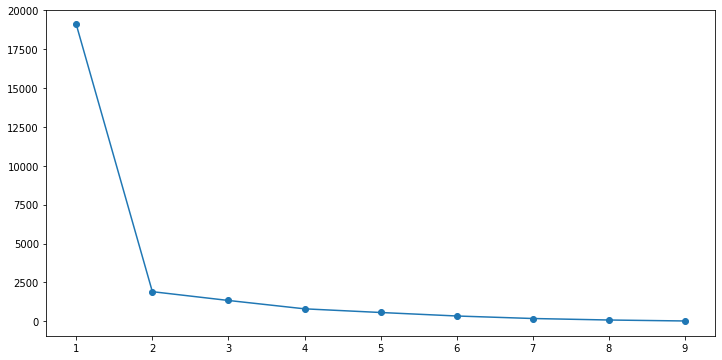

In [7]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [25]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [26]:
col = ['label','centroid']

In [27]:
kmeans.cluster_centers_

array([[16.8       , 14.        ],
       [77.5       , 62.5       ],
       [70.33333333, 83.        ]])

In [28]:
df = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df

,labels
0,0
1,0
2,0
3,0
4,0
5,1
6,2
7,2
8,1
9,2


In [1]:
# fit a model using AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
# cluster.fit_predict(X)  

In [35]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

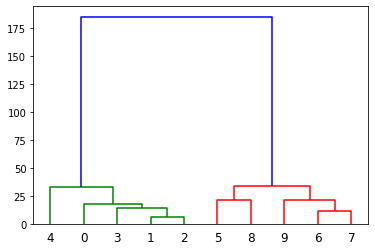

In [33]:
# create dendrogram
Z= linkage( X, method='ward')
# methods - “ward”, “complete”, “average”, “single”
dendrogram(Z)
plt.show()

In [17]:
print(cluster.labels_) 
print(cluster.n_clusters)

[1 1 1 1 1 0 0 0 0 0]
2


In [18]:
clustering = AgglomerativeClustering().fit_predict(X)
clustering 

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

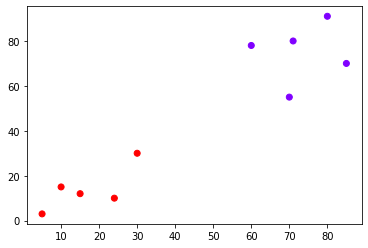

In [19]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [20]:
# Inference :
# You can see points in two clusters where the first five points clustered together 
# and the last five points clustered together.

# Example 2

Hierarchical clustering  for given dataset

In [36]:
# import libraries
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
import pandas as pd

In [37]:
# read the input data
# pandas library is needed to read the input file
customer_data = pd.read_csv('shopping_data.csv') 


In [38]:
customer_data.shape   # 200 rows and 5 columns

(200, 5)

In [39]:
customer_data.head() # sample records

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [40]:
# .values will return only the values in array format
data = customer_data.iloc[:, 2:5].values  
#data

In [41]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_nw = std.fit_transform(data)
data_nw

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [26]:
#dendogram

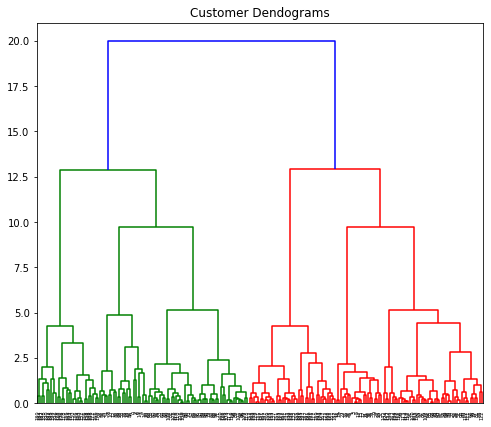

In [45]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(8, 7))  
plt.title("Customer Dendograms")  
Z= linkage(data_nw, method= 'ward')
dendrogram(Z)
plt.show()

In [28]:
# If we draw a horizontal line that passes through longest distance without a horizontal line, 
# we get 5 clusters as shown in the following figure:

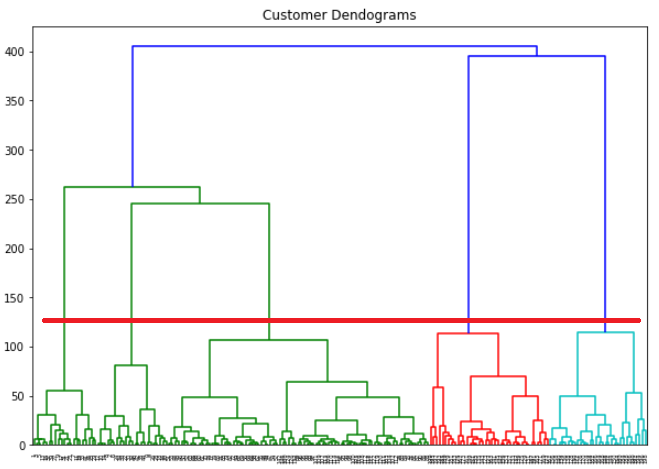

 Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters.
 
 Lets try to use Aggloemerative clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

we can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

In [51]:
# plot the cluster and visualize the cluster

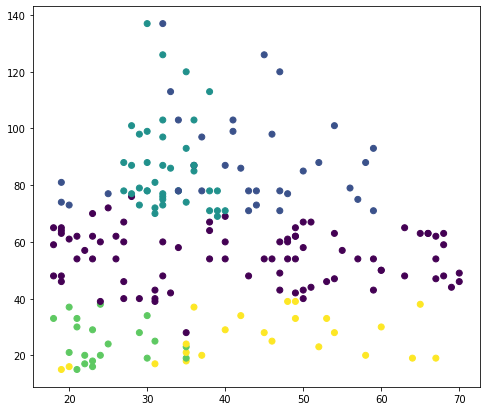

In [55]:
plt.figure(figsize=(8, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_)

Example 3

 hierarchical clustering on the seeds dataset. This dataset consists of measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian. It has variables which describe the properties of seeds like area, perimeter, asymmetry coefficient etc. There are 70 observations for each variety of wheat. You can find the details about the dataset

In [2]:
# import libraries
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
import pandas as pd


C:\Users\Mooventh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# read the input data
# pandas library is needed to read the input file
seed_data = pd.read_csv('Seed_data.csv') 


In [5]:
# data info

seed_data.shape 

## 210 rows and 8 columns

(210, 8)

In [35]:
# list few records

seed_data.head()

,'area','perimeter','compactness','length.of.kernel','width.of.kernal','asymmetry.coefficient','length.of.kernel.groove','type.of.seed'
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [36]:
# different varieties of wheat: Kama, Rosa and Canadian
# last caolumn , types of seed is 1,2,3 

In [37]:
# remove the type of seed col
data = seed_data.iloc[:, :7].values 
data[0]

array([15.26 , 14.84 ,  0.871,  5.763,  3.312,  2.221,  5.22 ])

In [38]:
#plot dendogram

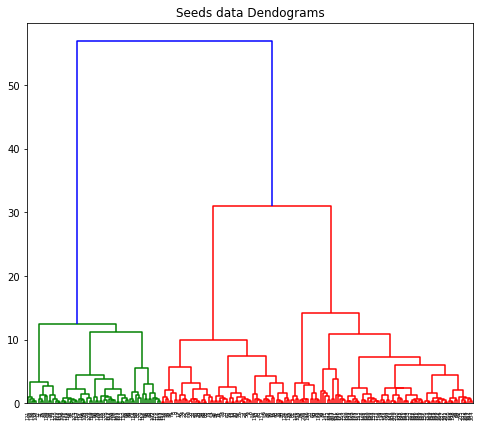

In [39]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 7))  
plt.title("Seeds data Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [40]:
# cutting the dendogram based on the height of the cluster
# Slize would be close to 25, # of clusters would be 3

In [41]:
#Agglomerative clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
# plot the cluster

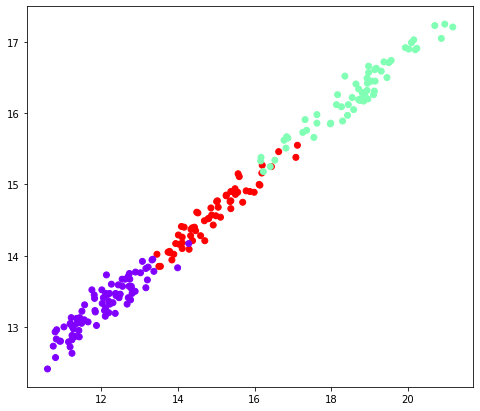

In [44]:
plt.figure(figsize=(8, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

In [45]:
#Hierarchical clustering using Iris data set

In [46]:
# Importing Modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [47]:
# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

# Features
print(iris_df.feature_names)

# Targets
print(iris_df.target)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [48]:

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

['setosa' 'versicolor' 'virginica']


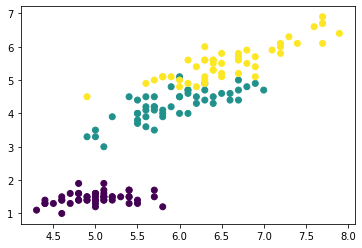

In [49]:
# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [50]:
#Hierarchical clustering

In [51]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# Reading the DataFrame
seeds_df = pd.read_csv("seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values



In [53]:
#dendogram

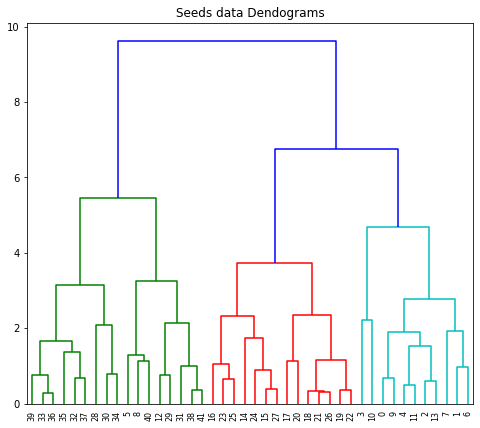

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 7))  
plt.title("Seeds data Dendograms")  
dend = shc.dendrogram(shc.linkage(samples, method='complete'))  

In [55]:
# inference : based on the height difference, when the horlizant line is between 6. 
# we should get 3 clusters

In [56]:
#Agglomerative clustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(samples) 


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
      dtype=int64)

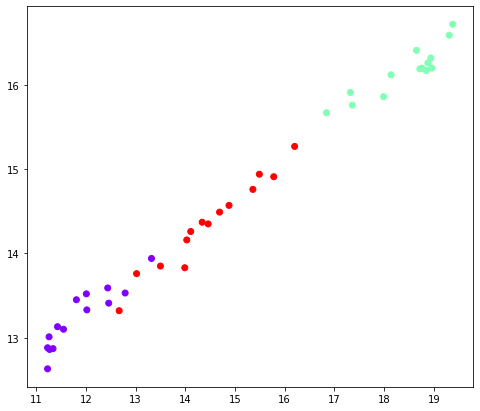

In [57]:
# plot the cluster

plt.figure(figsize=(8, 7))  
plt.scatter(samples[:,0], samples[:,1], c=cluster.labels_, cmap='rainbow') 